In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association



%matplotlib inline

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [3]:
print(df.head())
print(df.dtypes)
print(df.shape)

   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  
uid                    int64
asin                  object
title                 object
stars             

In [4]:
print(df['stars'].value_counts())
print(df['isBestSeller'].value_counts())

frequency_table = df['category'].value_counts().head(5)

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64
isBestSeller
False    2435671
True        7980
Name: count, dtype: int64


In [5]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller']).sort_values(by=True, ascending=False)

crosstab_result

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [6]:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

# in this case, the best-seller distribution is not independant of the product category, it's not random at all

(36540.202700613874, 0.0)

In [7]:
# Computing the association between variables in 'crosstab_result' using the "cramer" method

association(crosstab_result, method="cramer")
# weak connection between people liking one category and another

0.12228294397605641

<Axes: xlabel='category', ylabel='count'>

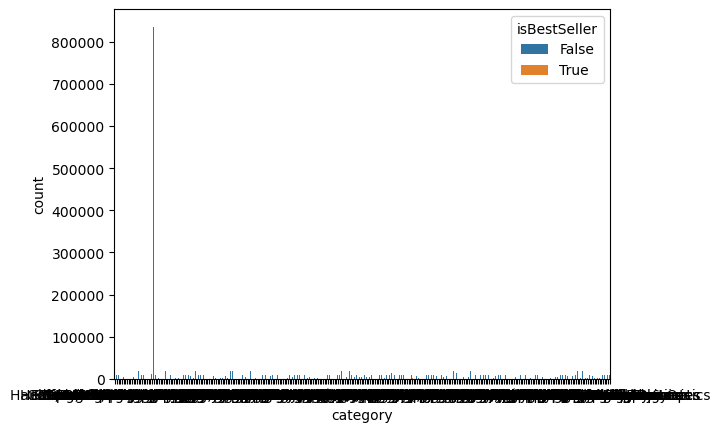

In [8]:
# Plotting a stacked bar chart for the 'crosstab_result' data
sns.countplot(data=df, x='category', hue='isBestSeller')

<Axes: xlabel='category', ylabel='price'>

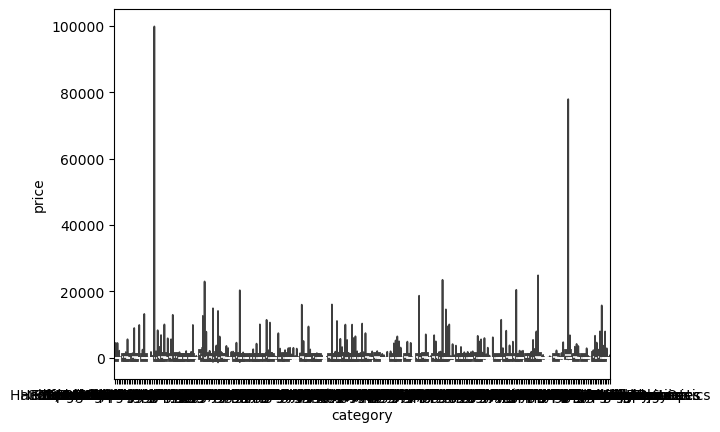

In [13]:
def product_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

  # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers




# Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
sns.violinplot(data=df, x='category', y='price')

In [ ]:
sns.barplot(data=df, x='category', y='price')

In [ ]:
# Plotting a box plot to visualize the spread and outliers of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.boxplot(data=df, x='category', y='stars')

In [ ]:
# Calculating the Pearson correlation coefficient between 'Price' and 'Stars' columns
correlation = df['price'].corr(df['stars'])
correlation

In [ ]:
# Calculating the Spearman rank correlation between 'price' and 'stars' 
correlation = df['price'].corr(df['stars'], method='spearman')
correlation

In [ ]:
# Plotting a scatter plot to visualize the relationship between 'stars' and 'price'
sns.scatterplot(data=df, x='stars', y='price')

In [ ]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [ ]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');